In [1]:
import os 
import pandas as pd
import numpy as np

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#  Functions

## Função de Plot modificada

In [2]:
def bullseye_plot(ax, data, seg_bold=None, cmap=None, norm=None):
    """
    Bullseye representation for the left ventricle.

    Parameters
    ----------
    ax : axes
    data : list of int and float
        The intensity values for each of the 17 segments
    seg_bold : list of int, optional
        A list with the segments to highlight
    cmap : ColorMap or None, optional
        Optional argument to set the desired colormap
    norm : Normalize or None, optional
        Optional argument to normalize data into the [0.0, 1.0] range


    Notes
    -----
    This function create the 17 segment model for the left ventricle according
    to the American Heart Association (AHA) [1]_

    References
    ----------
    .. [1] M. D. Cerqueira, N. J. Weissman, V. Dilsizian, A. K. Jacobs,
        S. Kaul, W. K. Laskey, D. J. Pennell, J. A. Rumberger, T. Ryan,
        and M. S. Verani, "Standardized myocardial segmentation and
        nomenclature for tomographic imaging of the heart",
        Circulation, vol. 105, no. 4, pp. 539-542, 2002.
    """
    if seg_bold is None:
        seg_bold = []

    linewidth = 2
    data = np.array(data).ravel()

    if cmap is None:
        cmap = plt.cm.viridis

    if norm is None:
        norm = mpl.colors.Normalize(vmin=data.min(), vmax=data.max())

    theta = np.linspace(0, 2 * np.pi, 768)
    r = np.linspace(0.2, 1, 4)

    # Create the bound for the segment 17
    for i in range(r.shape[0]):
        ax.plot(theta, np.repeat(r[i], theta.shape), '-k', lw=linewidth)

    # Create the bounds for the segments 1-12
    for i in range(6):
        theta_i = np.deg2rad(i * 60)
        ax.plot([theta_i, theta_i], [r[1], 1], '-k', lw=linewidth)

    # Create the bounds for the segments 13-16
    for i in range(4):
        theta_i = np.deg2rad(i * 90 - 45)
        ax.plot([theta_i, theta_i], [r[0], r[1]], '-k', lw=linewidth)

    # Fill the segments 1-6
    r0 = r[2:4]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i * 128:i * 128 + 128] + np.deg2rad(60)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128, 2)) * data[i]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i + 1 in seg_bold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[2], r[3]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[2], r[3]], '-k', lw=linewidth + 1)

    # Fill the segments 7-12
    r0 = r[1:3]
    r0 = np.repeat(r0[:, np.newaxis], 128, axis=1).T
    for i in range(6):
        # First segment start at 60 degrees
        theta0 = theta[i * 128:i * 128 + 128] + np.deg2rad(60)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((128, 2)) * data[i + 6]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i + 7 in seg_bold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[1], r[2]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[1], r[2]], '-k', lw=linewidth + 1)

    # Fill the segments 13-16
    r0 = r[0:2]
    r0 = np.repeat(r0[:, np.newaxis], 192, axis=1).T
    for i in range(4):
        # First segment start at 45 degrees
        theta0 = theta[i * 192:i * 192 + 192] + np.deg2rad(45)
        theta0 = np.repeat(theta0[:, np.newaxis], 2, axis=1)
        z = np.ones((192, 2)) * data[i + 12]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if i + 13 in seg_bold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
            ax.plot(theta0[0], [r[0], r[1]], '-k', lw=linewidth + 1)
            ax.plot(theta0[-1], [r[0], r[1]], '-k', lw=linewidth + 1)

    """
    # Fill the segments 17
    if data.size == 17:
        r0 = np.array([0, r[0]])
        r0 = np.repeat(r0[:, np.newaxis], theta.size, axis=1).T
        theta0 = np.repeat(theta[:, np.newaxis], 2, axis=1)
        z = np.ones((theta.size, 2)) * data[16]
        ax.pcolormesh(theta0, r0, z, cmap=cmap, norm=norm)
        if 17 in seg_bold:
            ax.plot(theta0, r0, '-k', lw=linewidth + 2)
    """

    ax.set_ylim([0, 1])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    

In [3]:
# Create Plot
#PuBu_r
def createPlot(df,log=False,color_name=None):
    
    color = plt.get_cmap(color_name)
    
    data_positivo = df[df['rig_bod_rot'] == 'RBR+'][df.columns[2]]
    data_negativo = df[df['rig_bod_rot'] == 'RBR-'][df.columns[2]].reset_index(drop=True)

    max_i=(data_positivo.max(), data_negativo.max())
    max_i=max(max_i)

    min_i=(data_positivo.min(), data_negativo.min())
    min_i=min(min_i)

    # Make a figure and axes with dimensions as desired.
    fig, ax = plt.subplots(figsize=(12, 8), nrows=1, ncols=2,
                           subplot_kw=dict(projection='polar'))
    fig.canvas.set_window_title('Left Ventricle Bulls Eyes (AHA)')

    # Create the axis for the colorbars
    axl = fig.add_axes([0.2, 0.15, 0.2, 0.05])
    axl2 = fig.add_axes([0.62, 0.15, 0.2, 0.05])

    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    #cmap = mpl.cm.color
    
    if log:
        norm = mpl.colors.LogNorm(vmin=min_i, vmax=max_i)
    else:
        norm = mpl.colors.Normalize(vmin=min_i, vmax=max_i)

    # ColorbarBase derives from ScalarMappable and puts a colorbar
    # in a specified axes, so it has everything needed for a
    # standalone colorbar.  There are many more kwargs, but the
    # following gives a basic continuous colorbar with ticks
    # and labels.
    cb1 = mpl.colorbar.ColorbarBase(axl, cmap=color, norm=norm,
                                    orientation='horizontal')
    cb1.set_label(f'{df.columns[2].upper()}')

    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    #cmap2 = mpl.cm.color
    if log:
        norm2 = mpl.colors.LogNorm(vmin=min_i, vmax=max_i)
    else:
        norm2 = mpl.colors.Normalize(vmin=min_i, vmax=max_i)

    # ColorbarBase derives from ScalarMappable and puts a colorbar
    # in a specified axes, so it has everything needed for a
    # standalone colorbar.  There are many more kwargs, but the
    # following gives a basic continuous colorbar with ticks
    # and labels.
    cb2 = mpl.colorbar.ColorbarBase(axl2, cmap=color, norm=norm2,
                                    orientation='horizontal')
    cb2.set_label(f'{df.columns[2].upper()}')

    # Create the 16 segment model
    bullseye_plot(ax[0], data_positivo, cmap=color, norm=norm)
    ax[0].set_title('RBR+')

    bullseye_plot(ax[1], data_negativo, cmap=color, norm=norm2)
    ax[1].set_title('RBR-')

    plt.savefig(f'figures/figure_{df.columns[2].upper()}.png', format = 'png')
    plt.show()

## Arrumo os dataframes

In [4]:
def make_newRows(df):
    
    #Ordena para sempre ter o mesmo padrão, garantindo que a posição 0 contém o positivo e o 1 negativo
    df = df.sort_values(by=['rig_bod_rot','segmento']).reset_index(drop=True)
    
    #Seleciona os segmentos agrupo por postivo negativo calcula média e seleciona o valor
    new_seg_positivo_14 = df[(df['segmento'] == 14) | (df['segmento'] == 15)].groupby('rig_bod_rot').mean().iloc[0,1]
    new_seg_negativo_14 = df[(df['segmento'] == 14) | (df['segmento'] == 15)].groupby('rig_bod_rot').mean().iloc[1,1]
    
    new_seg_positivo_16 = df[(df['segmento'] == 17) | (df['segmento'] == 18)].groupby('rig_bod_rot').mean().iloc[0,1]
    new_seg_negativo_16 = df[(df['segmento'] == 17) | (df['segmento'] == 18)].groupby('rig_bod_rot').mean().iloc[1,1]
    
    new_seg_positivo_15 = df[(df['segmento'] == 16)].iloc[0,1]
    new_seg_negativo_15 = df[(df['segmento'] == 16)].iloc[0,1]

    data =np.array([new_seg_positivo_14,
                    new_seg_negativo_14,

                    new_seg_positivo_15,
                    new_seg_negativo_15,

                    new_seg_positivo_16,
                    new_seg_negativo_16]).reshape(-1,1)

    segmento = np.array([14,14,15,15,16,16]).reshape(-1,1)
    
    rig_bod_rot = np.array(['RBR+','RBR-']*3).reshape(-1,1)
    
    data = np.hstack([rig_bod_rot,segmento,data])    
    
    return pd.DataFrame(data,columns=['rig_bod_rot','segmento',df.columns[2]])

In [5]:
def makeNewDf(df):
    #Cria as novas linhas
    new_rows_df = make_newRows(df)
    
    #Tira as velhas
    new_df = df[(df['segmento'] != 14) &
                (df['segmento'] != 15) &
                (df['segmento'] != 16) &
                (df['segmento'] != 17) &
                (df['segmento'] != 18)].sort_values(by = ['rig_bod_rot', 'segmento'])
    #Junta
    new_df = pd.concat([new_rows_df,new_df]).sort_values(by = ['rig_bod_rot', 'segmento']).reset_index(drop=True)

    new_df[df.columns[2]] = new_df[df.columns[2]].astype(float)
    new_df[df.columns[2]] = new_df[df.columns[2]].astype(int)
    
    return new_df


# Loading Data

In [8]:
trial_lst= [pd.read_csv(os.path.join('data',i),sep = ',') for i in os.listdir('data')]

# Arrumando dados

In [9]:
trial_lst = list(map(makeNewDf, trial_lst))

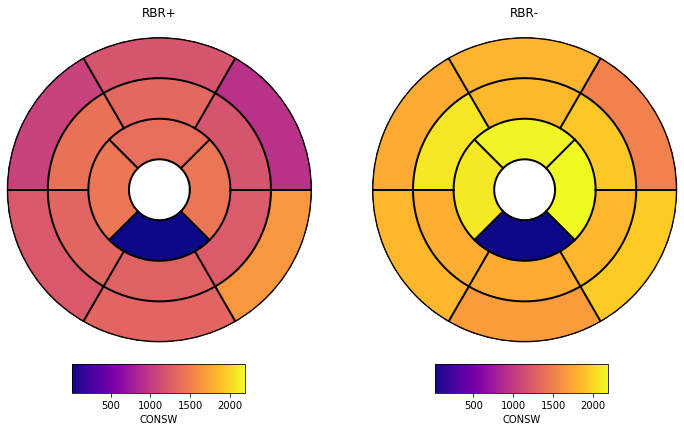

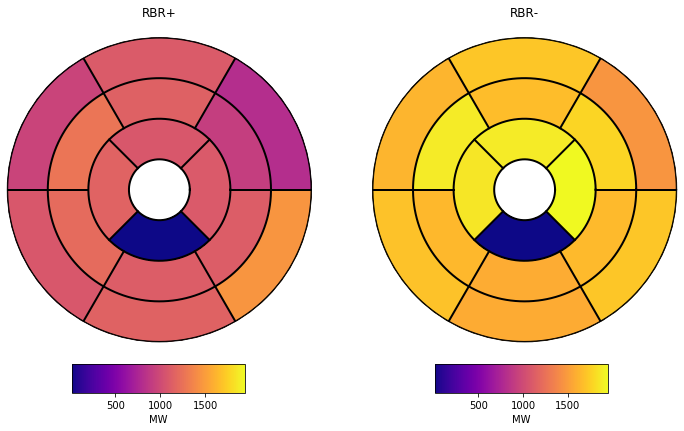

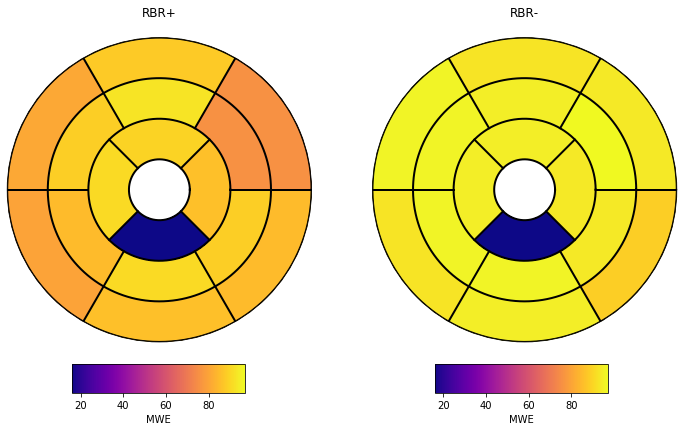

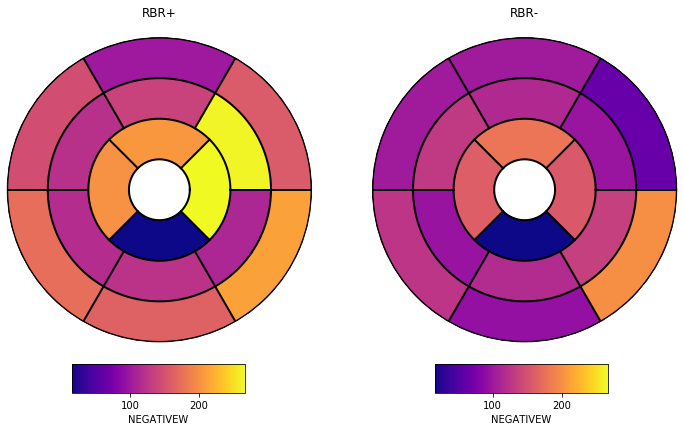

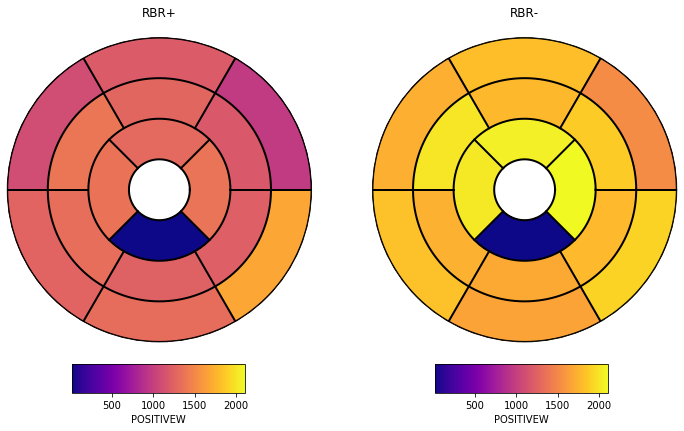

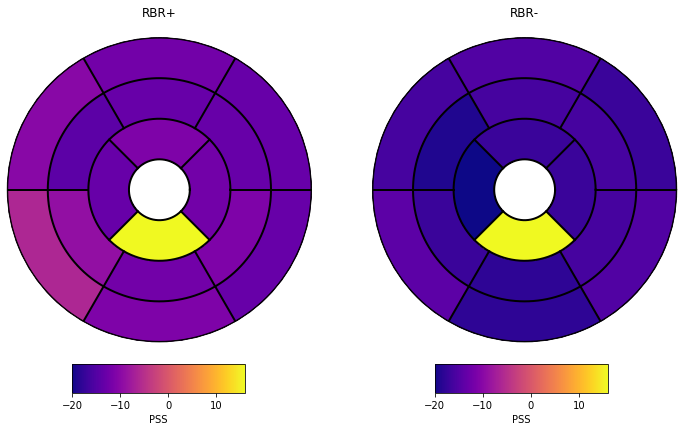

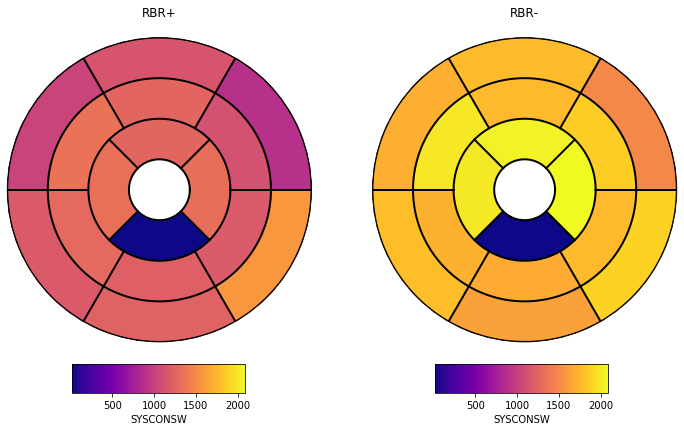

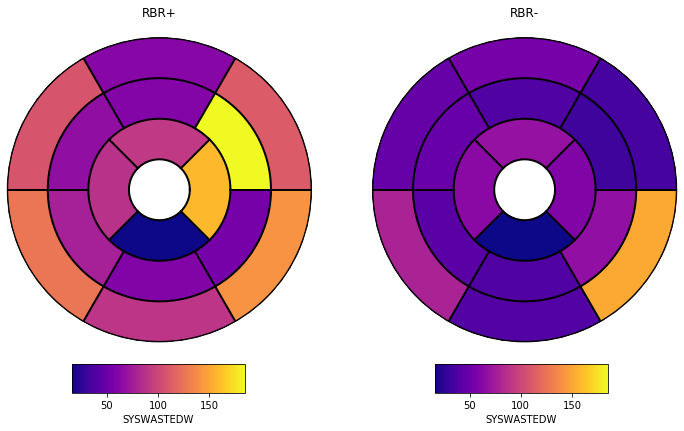

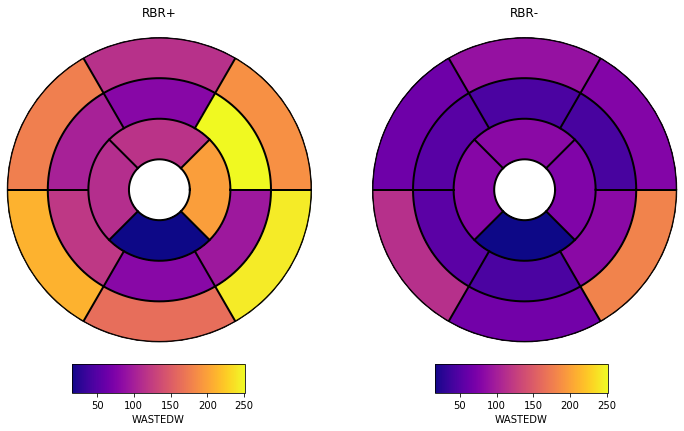

In [10]:
for i in trial_lst:
    createPlot(i,log=False, color_name='plasma')